In [2]:
import cv2,os
data_path="D:\PythonFiles\eyewear\Images\Patterns"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
if __name__ == '__main__':
    print(label_dict)
    print(categories)
    print(labels)

{'Animal Print': 0, 'Printed': 1, 'Solid-plain': 2, 'Tortoise': 3}
['Animal Print', 'Printed', 'Solid-plain', 'Tortoise']
[0, 1, 2, 3]


In [3]:
import numpy as np
from keras.utils import np_utils

img_size = 255
data = []
label = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        if img_name.endswith('.jpg' or '.JPG' or '.png'):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            try:
                resized = cv2.resize(img, (img_size, img_size))
                # resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                label.append(label_dict[category])
                # appending the image and the label(categorized) into the list (dataset)
            except Exception as e:
                print('Exception:', e)
                # if any exception rasied, the exception will be printed here. And pass to the next image


data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
label=np.array(label)
new_label=np_utils.to_categorical(label)
# print(new_label)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.2)

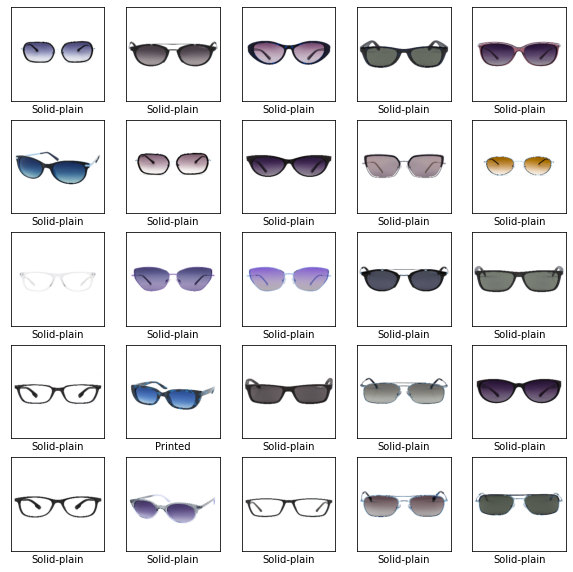

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_train[i]))
    plt.xlabel(categories[np.argmax(y_train[i])])
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D


# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=16)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/15
10/10 [==============================] - 13s 1s/step - loss: 1.4712 - accuracy: 0.7244
Epoch 2/15
10/10 [==============================] - 12s 1s/step - loss: 0.3979 - accuracy: 0.9295
Epoch 3/15
10/10 [==============================] - 11s 1s/step - loss: 0.2910 - accuracy: 0.9295
Epoch 4/15
10/10 [==============================] - 11s 1s/step - loss: 0.2120 - accuracy: 0.9359
Epoch 5/15
10/10 [==============================] - 11s 1s/step - loss: 0.2025 - accuracy: 0.9423
Epoch 6/15
10/10 [==============================] - 12s 1s/step - loss: 0.1301 - accuracy: 0.9551
Epoch 7/15
10/10 [==============================] - 11s 1s/step - loss: 0.1544 - accuracy: 0.9551
Epoch 8/15
10/10 [==============================] - 12s 1s/step - loss: 0.0833 - accuracy: 0.9808
Epoch 9/15
10/10 [==============================] - 12s 1s/step - loss: 0.0460 - accuracy: 0.9872
Epoch 10/15
10/10 [==============================] - 12s 1s/step - loss: 0.0212 - accuracy: 0.9936
Epoch 11/15
10/10 [

In [8]:
model.save('pattern_model.h5')